In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir
from time import time

from Algorithms.Functions.DE import DE
from Algorithms.Functions.PSO import PSO

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error


       y      x
0  10.07   77.6
1  14.73  114.9
2  17.94  141.1


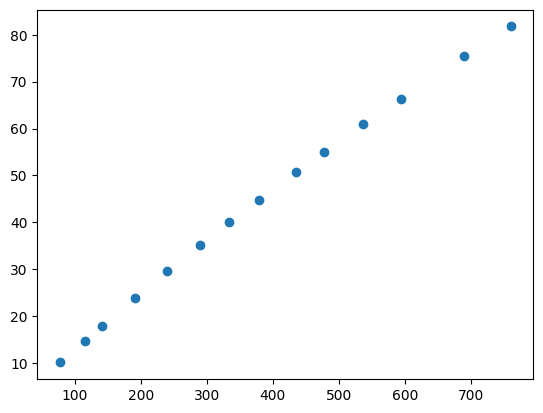

Processing:  16%|██████▍                                 | 16/100 [00:20<00:37,  2.25step/s]

In [ ]:

path = "."
lab_name = "Lab6"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")

def var9(X, dat):
    b1, b2, b3, b4, b5 = X
    return b1 + b2 * np.exp(-b4 * dat) + b3 * np.exp(-b5 * dat)

def var10(X, dat):
    b1, b2 = X
    return b1 * (1 - 1/(np.sqrt(1 + 2 * b2 * dat)))

def var11(X, dat):
    b1, b2 = X
    return (b1 * b2) / (1 + b2 * dat)

lts = [9, 10, 11]
lts = [11]
for i in lts:
    for data_path in datas_path:
            data = pd.read_excel(data_path, sheet_name=f"Var{i:02}")
            print(data.head(3))
            dat = data.to_numpy()
            plt.scatter(dat[:, 1], dat[:, 0])
            plt.show()
            test, train = train_test_split(dat, test_size=0.25)

            def funct9(X):
                return np.sum((dat[:, 0] - var9(X, dat[:, 1]))**2)

            def funct10(X):
                return np.sum((dat[:, 0] - var10(X, dat[:, 1]))**2)

            def funct11(X):
                return np.sum((dat[:, 0] - var11(X, dat[:, 1]))**2)

            funct9_limits = [[0, 10], [0, 5], *[[-2, 2] for _ in range(3)]]
            funct10_limits = [[100, 1000], [0, 1]]
            funct11_limits = [[100, 1000], [0, 1]]

            de = DE(100, 100, eval(f"funct{i}"), eval(f"funct{i}_limits"), plot=True, d3=False, d2=False, static=True, inf=True)
            print(de)
